### Câu 1: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv')
df.sample(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
186,3,256,volkswagen,std,two,hatchback,fwd,front,94.5,0.796252,...,8.5,90.0,5500.0,24,29,9980,9.791667,Low,0,1
162,1,168,toyota,std,two,hatchback,rwd,front,94.5,0.810668,...,9.4,112.0,6600.0,26,29,9538,9.038462,Medium,0,1
29,2,137,honda,std,two,hatchback,fwd,front,86.6,0.694858,...,9.6,58.0,4800.0,49,54,6479,4.795918,Low,0,1
160,1,168,toyota,std,two,hatchback,rwd,front,94.5,0.810668,...,9.0,70.0,4800.0,29,34,8238,8.103448,Low,0,1
157,0,91,toyota,std,four,hatchback,fwd,front,95.7,0.799135,...,9.0,70.0,4800.0,28,34,8358,8.392857,Low,0,1
140,0,102,subaru,std,four,sedan,4wd,front,97.0,0.826526,...,9.0,82.0,4800.0,24,25,9233,9.791667,Low,0,1
94,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,...,9.4,69.0,5200.0,31,37,7999,7.580645,Low,0,1
34,0,110,honda,std,four,sedan,fwd,front,96.5,0.785199,...,9.2,76.0,6000.0,30,34,7295,7.833333,Low,0,1
133,2,104,saab,turbo,four,sedan,fwd,front,99.1,0.896684,...,9.0,160.0,5500.0,19,26,18620,12.368421,High,0,1
32,1,101,honda,std,two,hatchback,fwd,front,93.7,0.720807,...,9.2,76.0,6000.0,30,34,6529,7.833333,Low,0,1


In [2]:
df.shape

(201, 29)

### Câu 2: Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?

In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [5]:
df['stroke'].unique()

array([2.68  , 3.47  , 3.4   , 2.8   , 3.19  , 3.39  , 3.03  , 3.11  ,
       3.23  , 3.46  , 3.9   , 3.41  , 3.07  , 3.58  , 4.17  , 2.76  ,
       3.15  , 3.2525, 3.16  , 3.64  , 3.1   , 3.35  , 3.12  , 3.86  ,
       3.29  , 3.27  , 3.52  , 2.19  , 3.21  , 2.9   , 2.07  , 2.36  ,
       2.64  , 3.08  , 3.5   , 3.54  , 2.87  ])

In [6]:
df['horsepower-binned'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [7]:
print('Feature bị khuyết giá trị : stroke và horsepower-binned')

Feature bị khuyết giá trị : stroke và horsepower-binned


### Câu 3: Tính correlation của các feature = ['bore', 'stroke', 'compression-ratio', 'horsepower']. Nhận xét xem có mối quan hệ tương quan nào không?

In [8]:
import seaborn as sns
df_cau3 = df.copy()
df_cau3 = df[['bore', 'stroke', 'compression-ratio', 'horsepower']]

In [9]:
corrMatrix = df_cau3.corr()
corrMatrix

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055389,0.001263,0.566936
stroke,-0.055389,1.000000,0.187906,0.098237
compression-ratio,0.001263,0.187906,1.000000,-0.214514
horsepower,0.566936,0.098237,-0.214514,1.000000


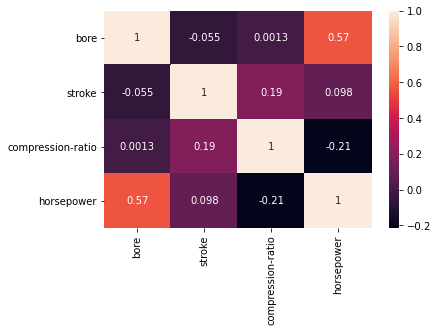

In [10]:
#Heatmap
sns.heatmap(corrMatrix, annot=True)

##### Mối quan hệ tương quan vừa (có tương quan):
    *bore - horsepower : 0.57
##### Mối quan không tương quan:
    *bore - stroke : -0.055
    *bore - compression-ratio : 0.0013
    *stroke - compression-ratio : 0.19
    *stroke - horsepower : 0.098
    *compression-ratio - horsepower : -0.21

### Câu 4: Phát họa scatterplot của 'engine-size' và 'price'

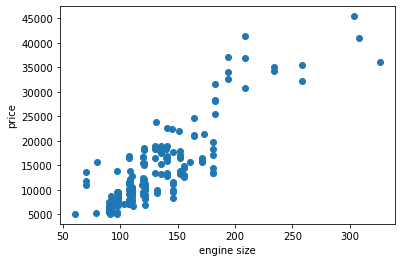

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['engine-size'], df['price'])
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()

### Câu 5: Tìm các feature có correlation so với price có ảnh hưởng nhiều nhất (đồng thuận, hoặc không đồng thuận)

In [12]:
df_cau5 = df.copy()

In [13]:
sort_by_price = pd.DataFrame(df_cau5.corr()['price']).sort_values(by = 'price', axis = 0)
sort_by_price

,price
highway-mpg,-0.704692
city-mpg,-0.686571
gas,-0.110326
peak-rpm,-0.101616
symboling,-0.082391
compression-ratio,0.071107
stroke,0.082274
diesel,0.110326
normalized-losses,0.133999
height,0.135486


##### Tương quan :
* Nghịch biến : highway-mpg, city-mpg
* Đồng biến : bore, wheel-base, length, width, city-L/100km, horsepower, curb-weight, engine-size

### Câu 6: Dùng seaborn để phát họa các regplot cho các feature đã tìm thấy.

In [14]:
df_cau6 = df.copy()
df_cau6 = df_cau6[['highway-mpg', 'city-mpg', 'bore', 'wheel-base', 'length', 'width', 'city-L/100km', 'horsepower', 'curb-weight', 'engine-size']]
df_cau6

,highway-mpg,city-mpg,bore,wheel-base,length,width,city-L/100km,horsepower,curb-weight,engine-size
0,27,21,3.47,88.6,0.811148,0.890278,11.190476,111.0,2548,130
1,27,21,3.47,88.6,0.811148,0.890278,11.190476,111.0,2548,130
2,26,19,2.68,94.5,0.822681,0.909722,12.368421,154.0,2823,152
3,30,24,3.19,99.8,0.848630,0.919444,9.791667,102.0,2337,109
4,22,18,3.19,99.4,0.848630,0.922222,13.055556,115.0,2824,136
...,...,...,...,...,...,...,...,...,...,...
196,28,23,3.78,109.1,0.907256,0.956944,10.217391,114.0,2952,141
197,25,19,3.78,109.1,0.907256,0.955556,12.368421,160.0,3049,141
198,23,18,3.58,109.1,0.907256,0.956944,13.055556,134.0,3012,173
199,27,26,3.01,109.1,0.907256,0.956944,9.038462,106.0,3217,145


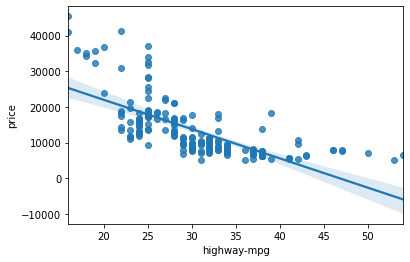

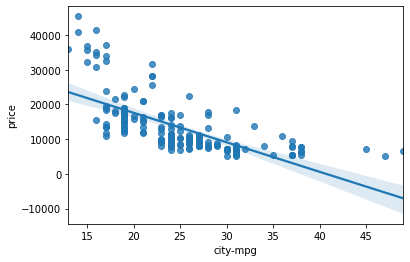

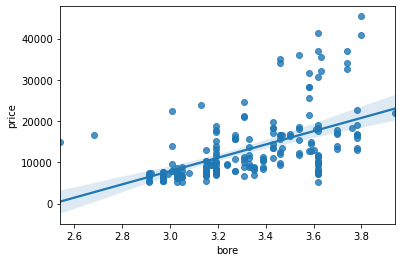

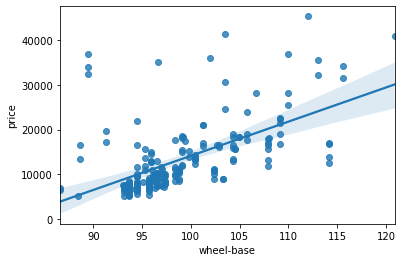

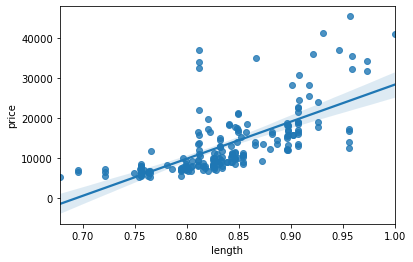

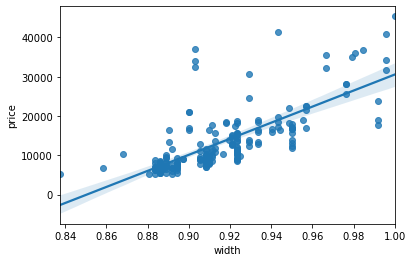

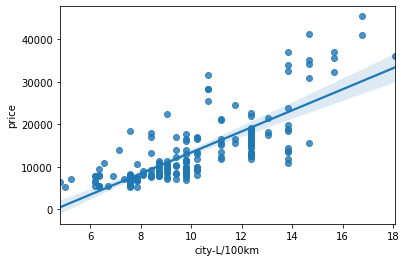

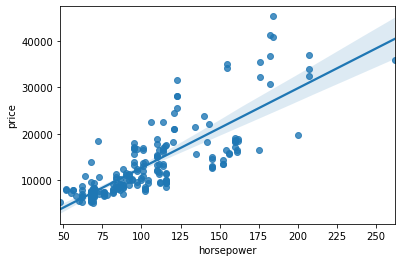

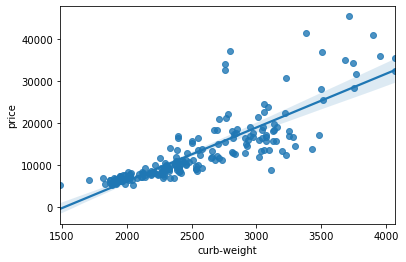

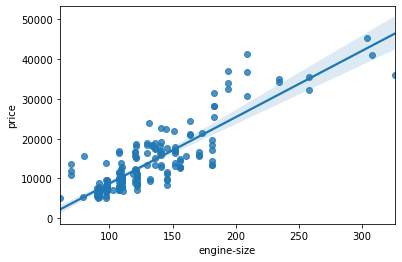

In [15]:
#regplot
for i in range(0, len(df_cau6.columns)):
    sns.regplot(df_cau6.iloc[:, i], df_cau5['price'])
    plt.show()

### Câu 7: Biến &#39;body-style&#39; là loại biến gì? Nếu là category thì đếm số lượng cho mỗi value. Kết quả trả về là một df với index là các value.

In [16]:
df_cau7 = df.copy()


In [17]:
df_cau7['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
pd.DataFrame(df_cau7['body-style'].value_counts())

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


### Câu 8: Phát họa các boxplot biểu diễn  theo price.

In [19]:
df_cau8 = df.copy()

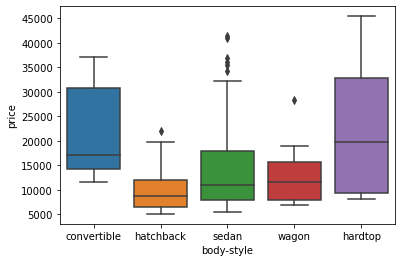

In [20]:
sns.boxplot(df_cau8['body-style'], df_cau8['price'])

### Câu 9: Viết hàm trích lọc các sample nằm trong miền biến thiên về giá theo các giá trị trong 'body-style'

In [21]:
def get_iqr(df, col):
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    mask = df[col].between(Q1, Q3, inclusive=True)
    iqr = df.loc[mask, :]
    return iqr
def get_iqr_sample(df, base_col,  col):
    IQR = pd.DataFrame()
    for label in df[base_col].value_counts().index:
        temp = df.loc[df[base_col]==label]
        IQR = IQR.append(get_iqr(temp, col), ignore_index = False)
    return IQR

In [22]:
result  = get_iqr_sample(df, "body-style", "price")
result

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710,12.368421,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430,10.217391,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,3,122,porsche,std,two,hardtop,rwd,rear,89.5,0.811629,...,9.5,207.0,5900.0,17,25,32528,13.823529,High,0,1
164,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,9639,9.791667,Medium,0,1
166,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,11199,9.791667,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1


### Câu 10: Căn cứ vào giá xe, chúng ta có thể nhận xét gì về các nhóm giá trị trong “engine-location”

In [23]:
df_cau10 = df.copy()

In [24]:
df_cau10[['engine-location', 'price']]

,engine-location,price
0,front,13495
1,front,16500
2,front,16500
3,front,13950
4,front,17450
...,...,...
196,front,16845
197,front,19045
198,front,21485
199,front,22470


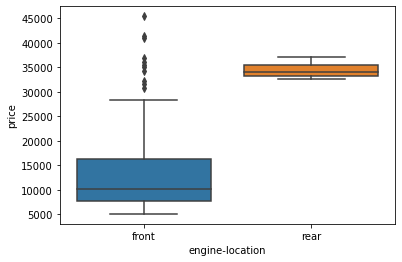

In [25]:
sns.boxplot(df_cau10['engine-location'], df_cau10['price'])

In [26]:
front_med = df_cau10[df_cau10['engine-location'] == 'front']['price'].quantile(0.5)
rear_med = df_cau10[df_cau10['engine-location'] == 'rear']['price'].quantile(0.5)
rear_med / front_med

3.329061292373918

Từ boxplot **giá xe** theo **vị trí đặt máy**, ta có thể thấy trung bình giá xe có vị trí đặt máy ở **_phía sau_** cao hơn khoảng **3.3 lần** xe có vị trí đặt máy ở **_phía trước_**. Và giá xe có vị trí đặt máy ở **_phía trước_** có sự dao động mạnh, bao gồm nhiều mức giá rải rác cao, còn xe có vị trí đặt máy ở **_phía sau_** thì gom lại trong khoảng giá hẹp, dễ phán đoán hơn.

### Câu 11: Tạo groupby các feature = ['drive-wheels', 'body-style'] theo trung bình giá (biến 'price'). Nhận xét xem bị khuyết nhóm nào?

In [27]:
df_cau11 = df.copy()

In [28]:
df_cau11[['drive-wheels','body-style', 'price']].groupby(['drive-wheels', 'body-style']).mean()

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

Giá trị **4wd** thuộc feature **'drive-wheels'**, bị khuyết hai giá trị thuộc feature **'body-style'** đó là : **convertible** và **hardtop**

### Câu 12: Tạo bảng bảng pivot thể hiện trung bình giá, với index dòng là 'drive-wheels', index cột là 'body-style'

In [29]:
df_cau12 = df.copy()

In [30]:
pivot_table = pd.pivot_table(df_cau12[['drive-wheels', 'body-style', 'price']], index = 'drive-wheels', columns = 'body-style')
pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Câu 13: Tạo heatmap thể hiện câu 12 (dùng mã màu là cmap='RdBu')

In [31]:
df_cau13 = df.copy()

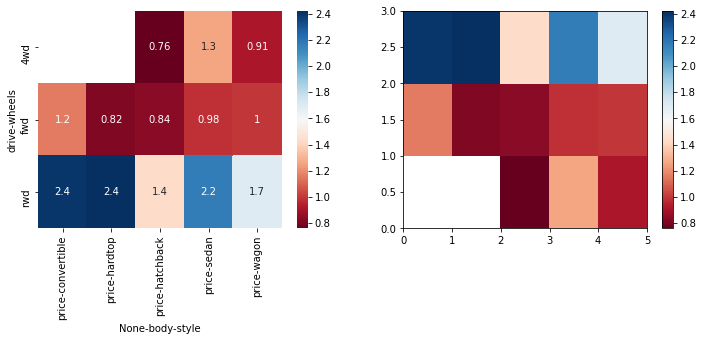

In [32]:
#Pivot_table = pivot_table/10000
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table/10000, annot=True, cmap='RdBu')
plt.subplot(1, 2, 2)
plt.pcolor(pivot_table/10000, cmap='RdBu')
plt.colorbar()
plt.show()

### Câu 14: Tính Pearson_correlation và P-value của 'wheel-base' và 'price' đưa ra kết luận nhận xét.

In [33]:
df_cau14 = df.copy()

In [34]:
#from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import pearsonr
pearson_coef, p_value = stats.pearsonr(df_cau14['wheel-base'], df_cau14['price'])
pearson_coef, p_value

(0.5846418222655081, 8.076488270732989e-20)

In [35]:
p_value < 0.001

True

* Hệ số tương quan Pearson của **'wheel-base'** so với **'price'** là **0.58** - ở mức tương quan yếu(**weak**)
* Giá trị **P-value < 0.001** : chứng tỏ mức tương quan mà ta vừa tìm được (**0.58**) có thể tin tưởng được

### Câu 15: Tính Pearson_correlation và P-value của 'length' và 'price' đưa ra kết luận nhận xét.

In [36]:
pearson_coef_15, p_value_15 = stats.pearsonr(df_cau14['length'], df_cau14['price'])
pearson_coef_15, p_value_15

(0.6906283810037582, 8.016476289929795e-30)

In [37]:
p_value_15 < 0.001

True

* Hệ số tương quan Pearson của **'length'** so với **'price'** là **0.69** - mức tương quan tương đối, nhưng vẫn yếu(**weak**)
* Giá trị **P-value < 0.001** : chứng tỏ mức tương quan mà ta vừa tìm được (**0.69**) có thể tin tưởng được

### Câu 16: Tiếp tục phân tích thăm dò các feature còn lại, theo anh/chị những feature nào có ảnh hưởng nhất đến giá xe? Anh/chị tạo df và lưu trữ nó.

In [38]:
df_cau16 = df.copy()

In [39]:
df_cau16.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


In [40]:
#Chọn ra feature từ Correlation:
df_selection = df_cau16[['highway-mpg', 'city-mpg', 'bore', 'wheel-base', 'length', 'width', 'city-L/100km', 'horsepower', 'curb-weight', 'engine-size', 'price']]
df_selection

,highway-mpg,city-mpg,bore,wheel-base,length,width,city-L/100km,horsepower,curb-weight,engine-size,price
0,27,21,3.47,88.6,0.811148,0.890278,11.190476,111.0,2548,130,13495
1,27,21,3.47,88.6,0.811148,0.890278,11.190476,111.0,2548,130,16500
2,26,19,2.68,94.5,0.822681,0.909722,12.368421,154.0,2823,152,16500
3,30,24,3.19,99.8,0.848630,0.919444,9.791667,102.0,2337,109,13950
4,22,18,3.19,99.4,0.848630,0.922222,13.055556,115.0,2824,136,17450
...,...,...,...,...,...,...,...,...,...,...,...
196,28,23,3.78,109.1,0.907256,0.956944,10.217391,114.0,2952,141,16845
197,25,19,3.78,109.1,0.907256,0.955556,12.368421,160.0,3049,141,19045
198,23,18,3.58,109.1,0.907256,0.956944,13.055556,134.0,3012,173,21485
199,27,26,3.01,109.1,0.907256,0.956944,9.038462,106.0,3217,145,22470


In [41]:
result  = get_iqr_sample(df_selection, "highway-mpg", "price")
result  = get_iqr_sample(result, "city-mpg", "price")
result  = get_iqr_sample(result, "bore", "price")
result  = get_iqr_sample(result, "wheel-base", "price")
result  = get_iqr_sample(result, "length", "price")
result  = get_iqr_sample(result, "width", "price")
result  = get_iqr_sample(result, "city-L/100km", "price")
result  = get_iqr_sample(result, "horsepower", "price")
result  = get_iqr_sample(result, "curb-weight", "price")
result  = get_iqr_sample(result, "engine-size", "price")
result

,highway-mpg,city-mpg,bore,wheel-base,length,width,city-L/100km,horsepower,curb-weight,engine-size,price
115,41,37,2.97,93.7,0.755887,0.886111,6.351351,68.000000,1918,90,5572
20,41,37,2.97,93.7,0.755887,0.886111,6.351351,68.000000,1876,90,5572
182,34,27,3.19,97.3,0.825084,0.909722,8.703704,85.000000,2275,109,8495
29,54,49,2.91,86.6,0.694858,0.887500,4.795918,58.000000,1713,92,6479
4,22,18,3.19,99.4,0.848630,0.922222,13.055556,115.000000,2824,136,17450
101,25,19,3.43,91.3,0.820279,0.943056,12.368421,160.000000,3071,181,17199
127,31,23,3.46,96.1,0.849592,0.925000,10.217391,104.256158,2460,132,9895
165,30,24,3.62,98.4,0.846708,0.911111,9.791667,116.000000,2551,146,9989
